In [1]:
# Import related packages and libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\Naila\\Desktop\\kulina-naila-fadhilah-project\\statistics'

In [3]:
# Importing dataframe from dataset.csv as df
# Assuming QUALITY as QUANTITY since there is no column of Quantity while the question asked for Quantity
df = pd.read_csv(r"dataset.csv")
df.head()

,id,order_date,user_id,product_id,quality
0,24,2019-01-03,62746,1,1
1,8989,2019-01-01,53424,28,1
2,8990,2019-01-01,53424,28,1
3,8991,2019-01-01,53424,28,1
4,8992,2019-01-01,53424,28,1


In [4]:
# Joining the column by aggregation, grouped by user_id whereas quality is summed-up
# The purpose of this is to know the total quantity each user has purchased
df_new = df.groupby(['user_id']).aggregate({'quality' : 'sum'}).reset_index()
mean_data = df_new["quality"].mean()
std_data = df_new["quality"].std()
df_new

,user_id,quality
0,6,3
1,9,14
2,12,9
3,82,4
4,98,39
...,...,...
28063,139507,1
28064,139530,1
28065,139541,15
28066,139596,6


In [5]:
frequency_data = {}

# Checking if the frequency of each total items were True
for data in df_new['quality']:
    try:
        frequency_data[data] += 1
    except:
        frequency_data[data] = 1
print(frequency_data)     

{3: 1548, 14: 468, 9: 725, 4: 1860, 39: 97, 17: 348, 2: 2716, 48: 87, 5: 3116, 13: 415, 8: 832, 28: 182, 65: 56, 15: 626, 1: 2087, 77: 49, 6: 1106, 7: 857, 10: 1347, 31: 153, 19: 286, 27: 190, 24: 196, 22: 241, 16: 381, 95: 32, 29: 183, 61: 53, 54: 65, 12: 544, 20: 485, 38: 129, 45: 112, 26: 175, 11: 505, 296: 2, 42: 92, 25: 256, 238: 2, 57: 56, 53: 65, 52: 65, 32: 148, 40: 146, 47: 72, 58: 45, 18: 327, 63: 49, 35: 140, 41: 101, 34: 122, 188: 6, 56: 59, 71: 50, 66: 54, 222: 4, 49: 75, 55: 66, 104: 19, 36: 156, 74: 43, 243: 1, 21: 213, 117: 17, 67: 40, 88: 36, 72: 50, 98: 18, 97: 23, 50: 87, 108: 23, 495: 1, 37: 103, 81: 49, 120: 11, 124: 14, 73: 39, 354: 1, 30: 229, 210: 5, 224: 2, 87: 39, 43: 77, 94: 27, 85: 35, 70: 65, 33: 127, 51: 67, 175: 7, 157: 4, 136: 7, 118: 9, 160: 12, 145: 8, 255: 1, 96: 17, 79: 39, 78: 46, 64: 51, 107: 11, 158: 6, 75: 45, 116: 8, 162: 9, 114: 16, 221: 1, 273: 1, 23: 230, 292: 1, 167: 6, 141: 4, 109: 20, 83: 41, 163: 6, 44: 93, 121: 6, 105: 17, 60: 86, 91: 21

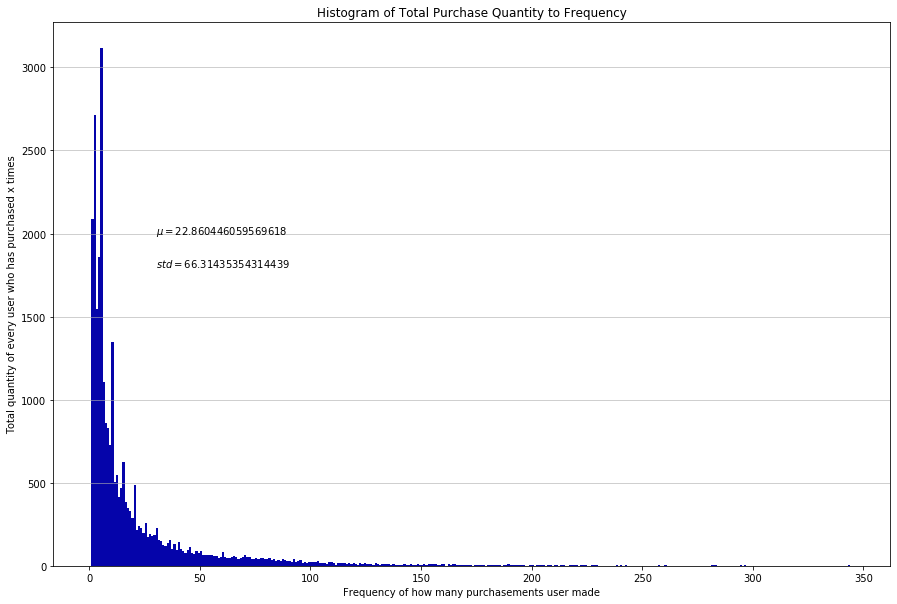

In [6]:
# Plot the total quantity of every user who has purchased to the frequency of how many user who has purchased.
# Roughly, the hypotetical analysis would be there are only a few users whom purchased more than 50 times.
fig, ax = plt.subplots(figsize=(15,10))
n, bins, patches = plt.hist(x = df_new["quality"], bins=np.arange(1,346), color="#0504aa")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Frequency of how many purchasements user made')
plt.ylabel('Total quantity of every user who has purchased x times')
plt.title('Histogram of Total Purchase Quantity to Frequency')
plt.text(30, 2000, r'$\mu={}$'.format(mean_data))
plt.text(30, 1800, r'$std={}$'.format(std_data))
plt.savefig('histogram1.png')

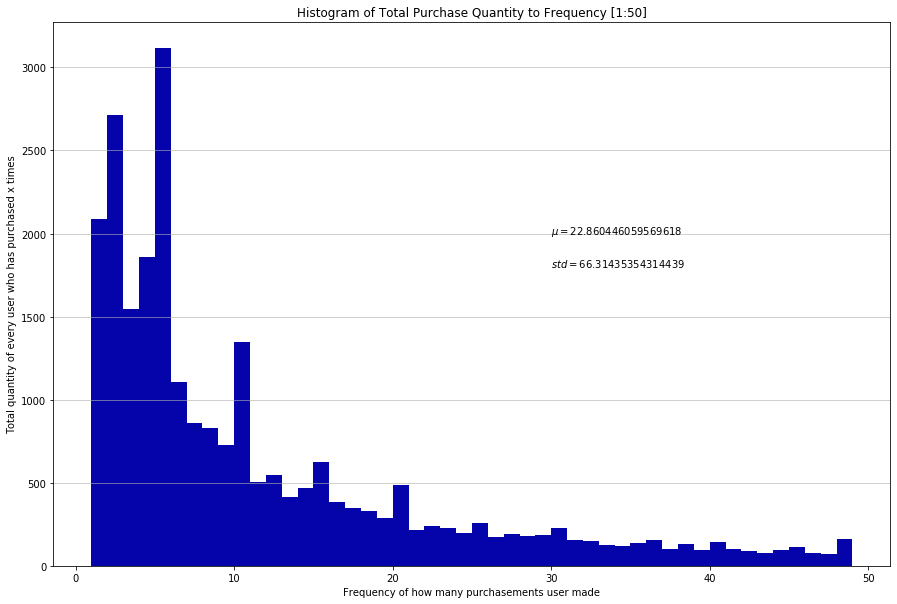

In [7]:
# Zoom the plot the total quantity each user has purchased to the frequency of purchase where frequency of .
# Roughly, the hypotetical analysis would be there are only a few users whom purchased more than 50 times.
fig, ax = plt.subplots(figsize=(15,10))
n, bins, patches = plt.hist(x = df_new["quality"], bins=np.arange(1,50), color="#0504aa")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Frequency of how many purchasements user made')
plt.ylabel('Total quantity of every user who has purchased x times')
plt.title('Histogram of Total Purchase Quantity to Frequency [1:50]')
plt.text(30, 2000, r'$\mu={}$'.format(mean_data))
plt.text(30, 1800, r'$std={}$'.format(std_data))
plt.savefig('histogram2.png')

## Raw Conclusion
The conclusion that can be made by the histogram of total purchase quantity to frequency is most users bought only 5 purchases and only a few users made more than 50 purchases in the year of 2019.

Therefore, what I think Kulina should consider to do is to whether:
    1. Attract more users, therefore more possibilites to increase sales, or
    2. Improving the frequency of current users' purchases.

The business recommendations I have come up with is for Kulina to highlight which products does most users most frequent to buy? We can first collect the data using the existing dataframe to make a raw plan to increase sales.

In [10]:
# Joining the column by aggregation, grouped by product_id whereas quality is summed-up
# The purpose of this is to know the total purchase quantity of each products
df_product = df.groupby(['product_id']).aggregate({'quality' : 'sum'})
sorted_df_product = df_product['quality'].sort_values(ascending=False).reset_index()
df_product

,quality
product_id,
1,129107
18,42049
20,13431
21,5495
22,8
...,...
865,6
866,2
867,90


In [11]:
frequency_data = {}

# Checking if the frequency of each total items were True
for data in df_product['quality']:
    try:
        frequency_data[data] += 1
    except:
        frequency_data[data] = 1

print(frequency_data)

{129107: 1, 42049: 1, 13431: 1, 5495: 1, 8: 8, 1: 22, 2101: 1, 53: 2, 21: 4, 37075: 1, 81: 2, 3241: 1, 13: 7, 3: 18, 12: 4, 589: 1, 4: 8, 576: 2, 7595: 1, 7771: 1, 4059: 1, 7: 8, 304: 1, 2268: 2, 4880: 1, 2750: 1, 6: 13, 1930: 1, 18: 3, 10: 4, 8124: 1, 33207: 1, 8691: 1, 7476: 1, 29455: 1, 14783: 1, 11805: 1, 61: 1, 25: 4, 9574: 1, 6861: 1, 3220: 1, 11460: 1, 3793: 1, 2742: 1, 1707: 1, 1175: 1, 5251: 1, 1818: 1, 10040: 1, 1777: 1, 19535: 1, 1343: 1, 3611: 1, 3436: 1, 9826: 1, 1039: 1, 238: 1, 2344: 1, 3675: 1, 444: 1, 406: 2, 1131: 1, 171: 2, 400: 1, 6727: 1, 570: 1, 1270: 1, 1186: 1, 15299: 1, 4557: 1, 2161: 1, 724: 1, 2593: 1, 49: 6, 1244: 1, 815: 1, 519: 1, 3461: 1, 2188: 1, 2800: 1, 1434: 1, 896: 1, 164: 1, 850: 1, 4284: 1, 333: 1, 107: 3, 231: 1, 38: 2, 22: 5, 600: 1, 299: 1, 1290: 1, 3080: 1, 2830: 1, 496: 1, 408: 1, 220: 1, 1774: 1, 537: 1, 16: 5, 1088: 2, 501: 1, 492: 1, 265: 1, 5: 13, 283: 1, 71: 2, 715: 1, 204: 1, 417: 1, 139: 1, 9263: 1, 1254: 1, 17: 2, 337: 1, 410: 1, 216: 

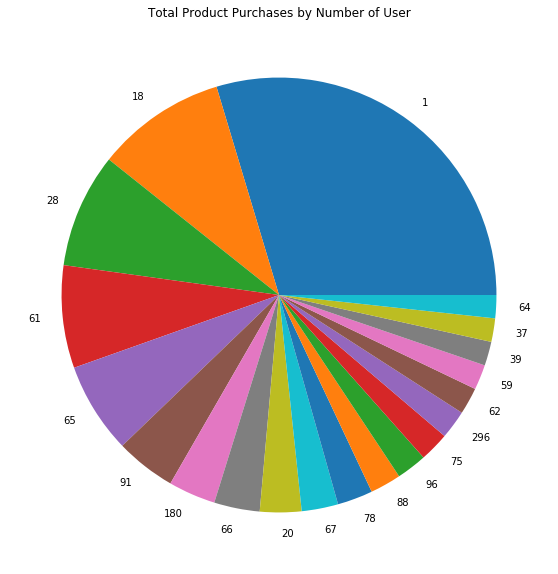

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the total product purchases by how many user bought one of the products.

# Roughly, the hypotetical analysis would be certain products are users' favorites among the others.
# We can utilize this data and make a marketing strategy such as grouping the most favorites products
# with the less and least favorites products and sell it as a package with exciting discounts.
# Therefore, the total sales of the whole products, including the sales of the least favorites one
# will be more likely to be increased.

fig = plt.figure(figsize =(100, 10)) 
plt.pie(sorted_df_product["quality"][:20], labels = sorted_df_product["product_id"][:20])
plt.title('Total Product Purchases by Number of User')
plt.show()
plt.savefig('pie_product.png')

In [11]:
# Sort by descending on total purchase of each product (represented by product_id)
sorted_df_product = pd.DataFrame(df_product['quality'].sort_values(ascending=False))

# 20 Most Purchased Products -- This info may be useful for sales strategies which we can make a highlight these 20 most purchased products
sorted_df_product.head(20)

,quality
product_id,
1,129107
18,42049
28,37075
61,33207
65,29455
91,19535
180,15299
66,14783
20,13431


## Final Conclusion
The conclusion that can be made by the pie chart of total product purchases by number of users is certain products are users' favorites among the others. We can utilize this data and make a marketing strategy such as grouping the most favorites products with the less and least favorites products and sell it as a package with exciting discounts.
Therefore, the total sales of the whole products, including the sales of the least favorites one will be more likely to be increased.

The final conclusion of business recommendation according to the data acquired is corresponding with the former raw conclusion from the histogram chart, wherein if Kulina wants to improve the the frequency of current users' purchases, then the suitable way to do it is to make some package meals/products where there is the favorite, less fav, and least fav products in one package while still highlighting the popular product to make it seems like a very good deal by also giving some benefits/discounts.